# Descriptores para toxicidade ===> indice ToxCast
# planilha simplificada

calculos para a tese

Ajustar config notebook para **T4**

**Feature selection**

In [52]:
import sklearn

# **planilha com os descriptores "ToxCast_final2.csv"**

In [53]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving ToxCast_final2.csv to ToxCast_final2 (1).csv


In [54]:
# matriz
data

,SMILES,ToxCast,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,OCCOC(=O)C1=CC=CC=C1O,3,11.982304,-3.456758,11.982304,0.790156,0.669395,182.175,172.095,182.057909,...,4,2,4,5,0,0,0,1,0.5413,45.4751
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,14.063983,-5.377055,14.063983,2.223343,0.610442,312.453,284.229,312.208930,...,2,0,2,3,3,0,3,4,4.6436,90.8570
2,CC(CC1=CC=CC=C1)NCCCCl,0,8.339061,-4.159710,8.339061,0.964127,0.563849,211.736,193.592,211.112777,...,1,1,2,7,0,0,0,1,2.8361,62.9477
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,13.809505,-4.341167,13.809505,0.464390,0.788239,423.901,397.693,423.167332,...,8,1,10,7,0,2,2,4,1.4786,112.0694
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,8.780247,-3.182585,8.780247,0.535972,0.451292,409.782,403.734,405.797772,...,0,0,8,0,2,0,2,3,5.6828,81.2160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,CCCCCCCCNC,0,7.803614,-4.505425,7.803614,0.986281,0.540038,143.274,122.106,143.167400,...,1,1,1,9,0,0,0,0,2.5663,47.3027
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16,8.586583,-4.521377,8.586583,1.969861,0.755501,234.383,208.175,234.198365,...,1,1,1,3,0,0,0,1,4.5496,74.8848
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0,11.053471,-1.180185,11.053471,0.307346,0.740184,191.013,186.981,189.958835,...,2,1,4,1,0,0,0,1,2.6916,43.4213
8743,ClCC=CCl,0,6.731481,-2.320602,6.731481,0.671296,0.453516,110.971,106.939,109.969005,...,0,0,2,1,0,0,0,0,1.9777,25.7130


**Removendo linhas onde não foi feito o calculo do descriptor (referencia coluna = BCUT2D_MWLOW)**

In [55]:
df_remove = data.loc[data['BCUT2D_MWLOW'].isnull()]
data2 = data.drop(df_remove.index)
len(data2)

8138

In [56]:
 X = data2.drop(['SMILES',	'ToxCast'], axis=1)

In [57]:
print(X.shape)
saida = data2['ToxCast']   #separando a saida do modelo dos dados originais

(8138, 121)


In [58]:
# autoescalonamento da matriz de entrada
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)

# Drop rows with any missing values in X before scaling
X_cleaned = X.dropna()

# Also drop the corresponding rows from saida to keep indices aligned
saida_cleaned = saida.loc[X_cleaned.index]

# Fit and transform the cleaned data
X2 = pd.DataFrame(scaler.fit_transform(X_cleaned), index=X_cleaned.index, columns=X_cleaned.columns) # Preserve original index and column names

In [59]:
X2

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,0.366708,0.344791,0.366622,-0.195571,0.670894,-0.586255,-0.568602,-0.585008,-0.526609,-0.019204,...,0.103100,0.373078,-0.246132,-0.278550,-0.285385,-0.341065,-0.427424,-0.463666,-0.808176,-0.664683
1,1.172147,-0.934572,1.172097,1.316357,0.357258,0.211637,0.160402,0.213041,0.366416,-0.019204,...,-0.515653,-0.654370,-0.742175,-0.627267,4.381323,-0.341065,2.427605,1.380875,0.993085,0.438736
2,-1.042930,-0.123538,-1.043076,-0.012042,0.109377,-0.405207,-0.428846,-0.406852,-0.394309,-0.019204,...,-0.825030,-0.140646,-0.742175,0.070168,-0.285385,-0.341065,-0.427424,-0.463666,0.199438,-0.239853
3,1.073686,-0.244431,1.073631,-0.539235,1.303163,0.894203,0.898052,0.893406,0.928692,-0.019204,...,1.340607,-0.140646,1.241998,0.070168,-0.285385,2.226548,1.475928,1.380875,-0.396621,0.954495
4,-0.872228,0.527454,-0.872366,-0.463720,-0.489443,0.807731,0.937326,0.786901,0.002591,-0.019204,...,-1.134406,-0.654370,0.745954,-1.150343,2.825753,-0.341065,1.475928,0.766028,1.449382,0.204324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,-1.250105,-0.353865,-1.250259,0.011329,-0.017302,-0.824505,-0.893590,-0.823474,-0.658910,-0.019204,...,-0.825030,-0.140646,-0.990197,0.418885,-0.285385,-0.341065,-0.427424,-1.078514,0.080972,-0.620247
8741,-0.947160,-0.364492,-0.947301,1.048949,1.128989,-0.266505,-0.334039,-0.265298,-0.096634,-0.019204,...,-0.825030,-0.140646,-0.990197,-0.627267,-0.285385,-0.341065,-0.427424,-0.463666,0.951811,0.050386
8742,0.007325,1.861516,0.007224,-0.704908,1.047503,-0.532126,-0.471825,-0.536562,-0.725060,-0.019204,...,-0.515653,-0.140646,-0.246132,-0.975984,-0.285385,-0.341065,-0.427424,-0.463666,0.135990,-0.714619
8743,-1.664933,1.101734,-1.665105,-0.320961,-0.477613,-1.022345,-0.992193,-1.027037,-1.188110,-0.019204,...,-1.134406,-0.654370,-0.742175,-0.975984,-0.285385,-0.341065,-0.427424,-1.078514,-0.177473,-1.145180


# Feature selection

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

# Choose the number of top features you want to select
k = 63 # You can change this number based on your needs

# Create a SelectKBest object with the desired scoring function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform your data to select the top k features
X_new = selector.fit_transform(X2, saida_cleaned)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X2.columns[selected_features_indices]

print("Original number of features:", X2.shape[1])
print("Number of selected features:", X_new.shape[1])
print("Names of selected features:", selected_features_names)

Original number of features: 121
Number of selected features: 63
Names of selected features: Index(['MaxEStateIndex', 'MaxAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MRHI', 'BalabanJ',
       'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n',
       'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1',
       'Kappa2', 'LabuteASA', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA5', 'SMR_VSA7',
       'SMR_VSA9', 'SlogP_VSA11', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6',
       'SlogP_VSA8', 'EState_VSA1', 'EState_VSA11', 'EState_VSA9',
       'VSA_EState1', 'VSA_EState10', 'VSA_EState4', 'VSA_EState5',
       'VSA_EState6', 'VSA_EState7', 'FractionCSP3', 'HeavyAtomCount',
       'NumAliphaticCarbocycles', 'NumAliphaticRings',
       'NumAromaticCarbocycles', 'NumAromaticRings', 'Nu

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, saida_cleaned, test_size=0.25, random_state=13)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

# Modelo Extra Tree Regressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

modelo = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=2, random_state=13).fit(X_train, y_train)

In [63]:
# calculo de previsão

ypred = modelo.predict(X_test)

ypredc = modelo.predict(X_train)

ypredv = modelo.predict(X_validation)

# Avaliação

In [64]:
from sklearn.metrics import mean_squared_error
import math

mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msev = mean_squared_error(y_validation, ypredv)
rmsev = math.sqrt(msev)
print('\n')
print("The mean squared error (MSE) on validation set: {:.4f}".format(msev))
print("The root mean squared error (RMSE) on validation set: {:.4f}".format(rmsev))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

The mean squared error (MSE) on test set: 82.0754
The root mean squared error (RMSE) on test set: 9.0595


The mean squared error (MSE) on validation set: 84.8600
The root mean squared error (RMSE) on validation set: 9.2120


The mean squared error (MSE) on training set: 5.0671
The root mean squared error (RMSE) on training set: 2.2510


In [65]:
from sklearn.metrics import mean_absolute_error

maet = mean_absolute_error(y_test, ypred)
print("The mean absolute error (MAE) on test set: {:.4f}".format(maet))
maec = mean_absolute_error(y_train, ypredc)
print('\n')
print("The mean absolute error (MAE) on training set: {:.4f}".format(maec))
maev = mean_absolute_error(y_validation, ypredv)
print('\n')
print("The mean absolute error (MAE) on validation set: {:.4f}".format(maev))

The mean absolute error (MAE) on test set: 5.8262


The mean absolute error (MAE) on training set: 1.0872


The mean absolute error (MAE) on validation set: 5.7307


In [66]:
from sklearn.metrics import r2_score

# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 (teste): ', test_r2)

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 (calibração): ', cal_r2)

# avaliação do conj validação
val_r2 = r2_score(y_validation, ypredv)
print('Reg linear coef R2 (validação): ', val_r2)

Reg linear coef R2 (teste):  0.4507665286552305
Reg linear coef R2 (calibração):  0.968114544266471
Reg linear coef R2 (validação):  0.44631010654840064


Text(0.5, 0, 'y experimental')

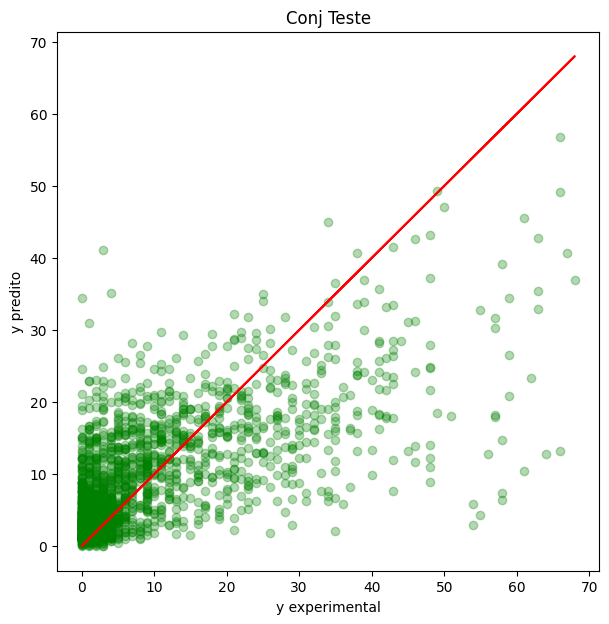

In [67]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

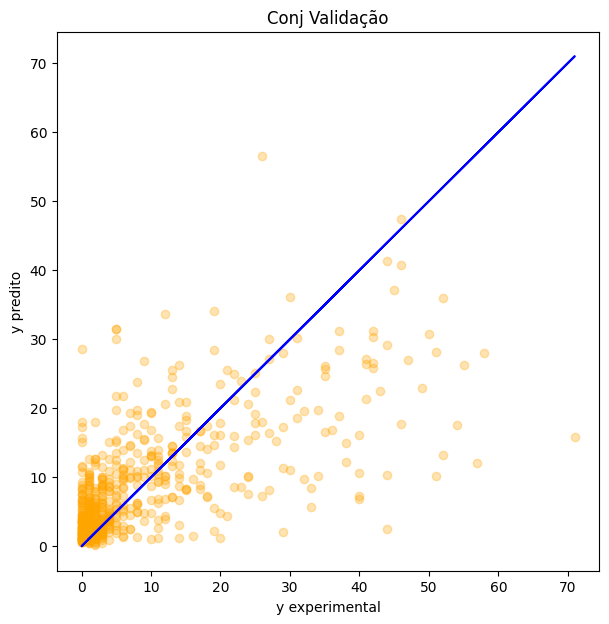

In [68]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_validation, y=ypredv, c='orange' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_validation, y_validation, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_validation, p(y_validation), 'blue')  # cor da linha e geraçao da mesma
plt.title('Conj Validação')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

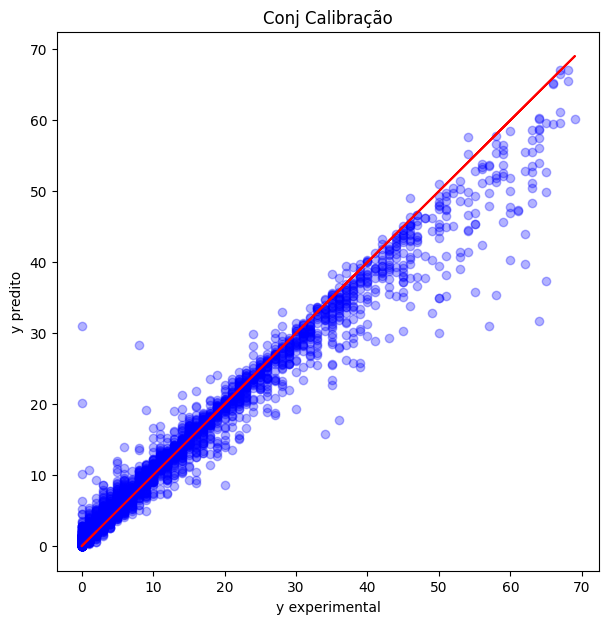

In [69]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração')
plt.ylabel('y predito')
plt.xlabel('y experimental')

# Feature importance

In [70]:
from sklearn.inspection import permutation_importance

# Compute permutation importance on validation data
result = permutation_importance(
    modelo, X_test, y_test,          # procedimento testado com os conjunto X_test e y_test
    n_repeats=10,              # how many times to permute
    random_state=42,
    scoring='r2'               # or 'neg_mean_squared_error'
)


MolLogP - Feature 61 - Importance: 0.0830
NumAromaticCarbocycles - Feature 56 - Importance: 0.0450
SMR_VSA7 - Feature 36 - Importance: 0.0359
BalabanJ - Feature 11 - Importance: 0.0321
PEOE_VSA6 - Feature 29 - Importance: 0.0225
MolMR - Feature 62 - Importance: 0.0203
MaxEStateIndex - Feature 0 - Importance: 0.0202
MaxAbsEStateIndex - Feature 1 - Importance: 0.0178
SlogP_VSA11 - Feature 38 - Importance: 0.0157
qed - Feature 2 - Importance: 0.0155
SlogP_VSA6 - Feature 41 - Importance: 0.0142
SlogP_VSA5 - Feature 40 - Importance: 0.0138
SMR_VSA10 - Feature 34 - Importance: 0.0120
HeavyAtomMolWt - Feature 4 - Importance: 0.0114
FpDensityMorgan1 - Feature 7 - Importance: 0.0111
VSA_EState7 - Feature 51 - Importance: 0.0102
Chi0v - Feature 15 - Importance: 0.0094
VSA_EState5 - Feature 49 - Importance: 0.0094
SMR_VSA9 - Feature 37 - Importance: 0.0090
Chi2n - Feature 19 - Importance: 0.0085
SMR_VSA5 - Feature 35 - Importance: 0.0082
MolWt - Feature 3 - Importance: 0.0077
SlogP_VSA4 - Feature

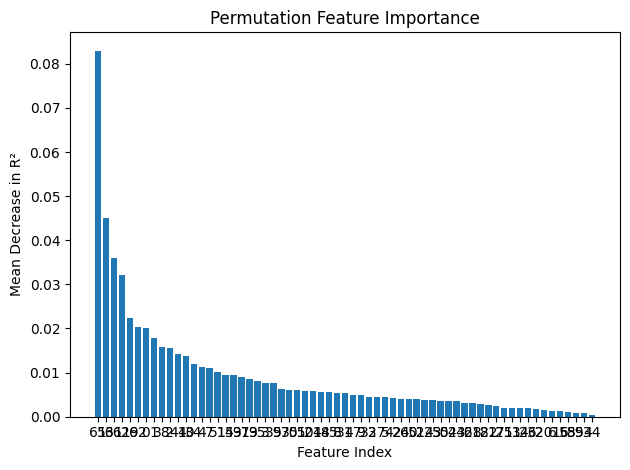

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by importance
sorted_idx = result.importances_mean.argsort()[::-1]

# Print top features
for idx in sorted_idx:
    print(f"{selected_features_names[idx]} - Feature {idx} - Importance: {result.importances_mean[idx]:.4f}")


# Calculate and print the sum of all feature importances
total_importance = np.sum(result.importances_mean)
print(f"\nSum of all feature importances: {total_importance:.4f}")


# Optional: plot
# Use the number of selected features for the x-axis range
plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx])
# Use the sorted indices themselves as labels for the x-axis ticks
plt.xticks(ticks=range(len(sorted_idx)), labels=sorted_idx)
plt.xlabel("Feature Index")
plt.ylabel("Mean Decrease in R²")
plt.title("Permutation Feature Importance")
plt.tight_layout()
plt.show()



# modelo usando scores do PCA como dados de entrada

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 25)  # 25 componentes
pca.fit(X_new)
scores = pca.transform(X_new)   # scores
loadings = pca.components_.T  #loadings

In [73]:
# variancia acumulada para cada PC em %
import numpy as np
ss = np.cumsum(pca.explained_variance_ratio_)
print(ss*100)

[49.79690055 61.85987816 68.74213152 73.62886697 77.80085461 80.66932102
 83.11726921 85.29955927 87.02089596 88.59486396 89.92509858 91.10327741
 92.07139237 92.93334827 93.77684445 94.49094732 95.14896075 95.71900778
 96.23113744 96.72733512 97.17389106 97.51163264 97.79976853 98.08328468
 98.32463928]


In [74]:
# Explained variance ratio in %
print("Explained Variance Ratio (in %):", (pca.explained_variance_ratio_ * 100))

Explained Variance Ratio (in %): [49.79690055 12.06297761  6.88225336  4.88673546  4.17198764  2.86846641
  2.44794819  2.18229007  1.72133668  1.57396801  1.33023461  1.17817883
  0.96811495  0.8619559   0.84349618  0.71410287  0.65801343  0.57004703
  0.51212966  0.49619768  0.44655594  0.33774158  0.28813589  0.28351615
  0.2413546 ]


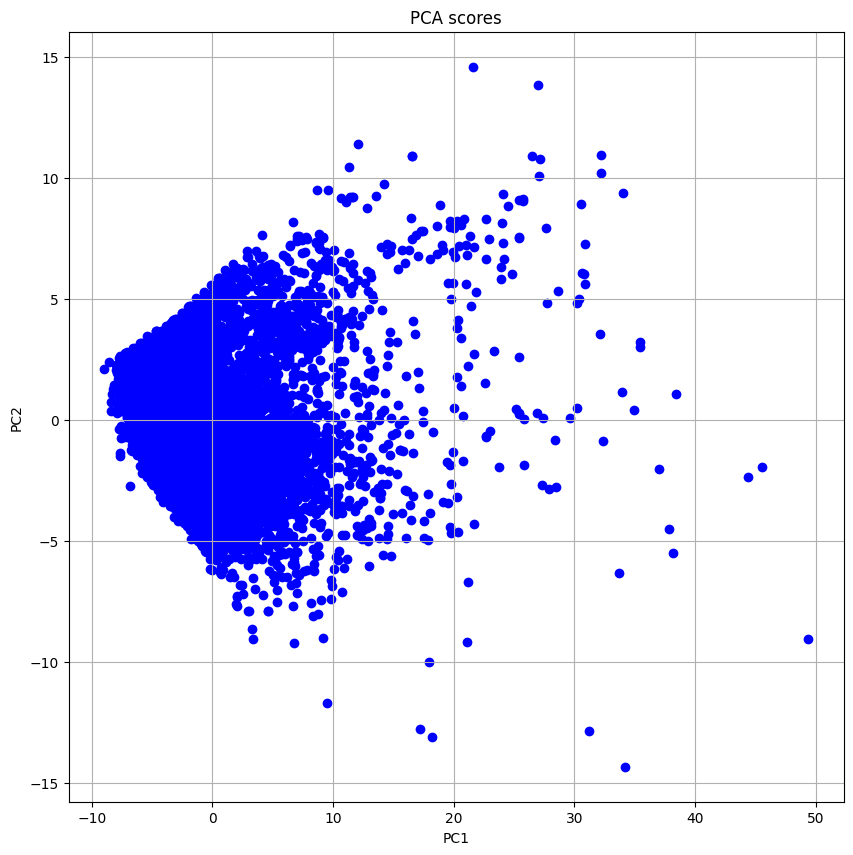

In [75]:
#scores = scores*(-1)
plt.figure(figsize=(10,10))
plt.scatter(scores[:,0], scores[:,1], marker='o', color='b')  # PC1 x PC2

plt.title('PCA scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

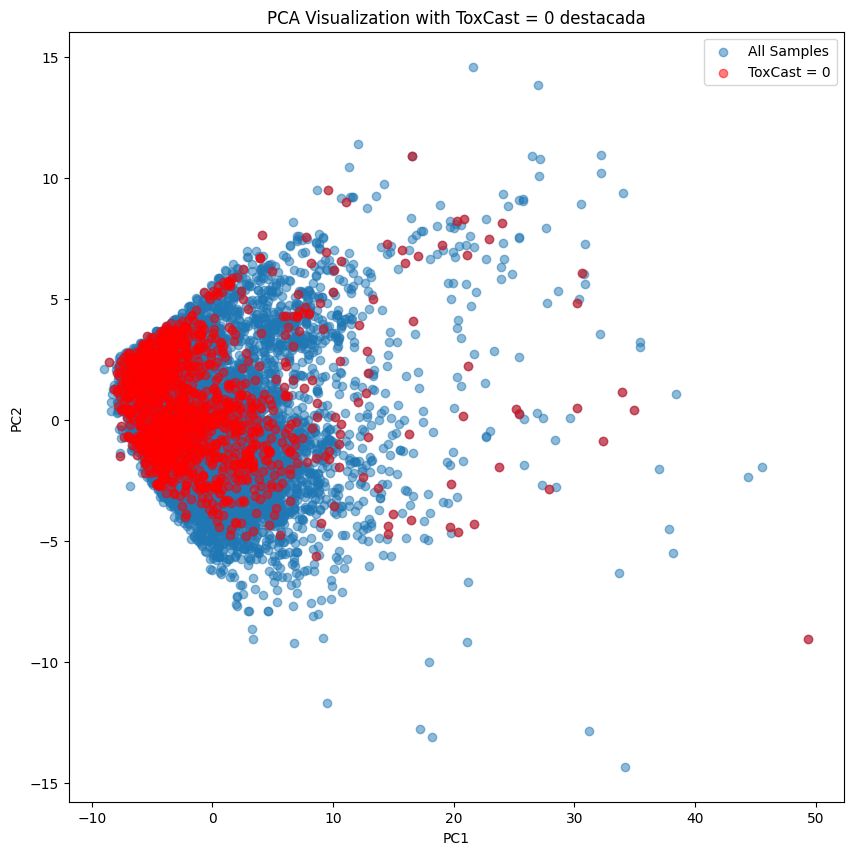

In [76]:
# Get indices of samples where data2['ToxCast'] is zero
zero_indices = data2[data2['ToxCast'] == 0].index

# Filter zero_indices to include only indices present in the X_cleaned index
# This is necessary because some rows from data2 might have been dropped
# during the data cleaning and feature selection steps before PCA.
# X_cleaned is a DataFrame and retains the original index, and scores
# corresponds to the rows of X_cleaned in the same order.
valid_zero_indices_in_cleaned_data = zero_indices.intersection(X_cleaned.index)

# Get the integer positions of these valid indices within the X_cleaned (and thus scores) data
# We need the positions (0, 1, 2, ...) in the numpy array, not the original index values.
# Create a mapping from original index value to position in X_cleaned's index.
index_to_position = {index: position for position, index in enumerate(X_cleaned.index)}

# Get the positions for the valid zero indices
zero_positions_in_scores = [index_to_position[idx] for idx in valid_zero_indices_in_cleaned_data]

# Plot PCA results, highlighting samples with ToxCast = 0
plt.figure(figsize=(10, 10))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, label='All Samples')  # Plot all samples
# Use the filtered integer positions to select rows from the scores array
plt.scatter(scores[zero_positions_in_scores, 0], scores[zero_positions_in_scores, 1], color='red', alpha=0.5, label='ToxCast = 0')  # Highlight ToxCast = 0 samples
plt.title("PCA Visualization with ToxCast = 0 destacada")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

Enter the minimum ToxCast value: 50
Enter the maximum ToxCast value: 70


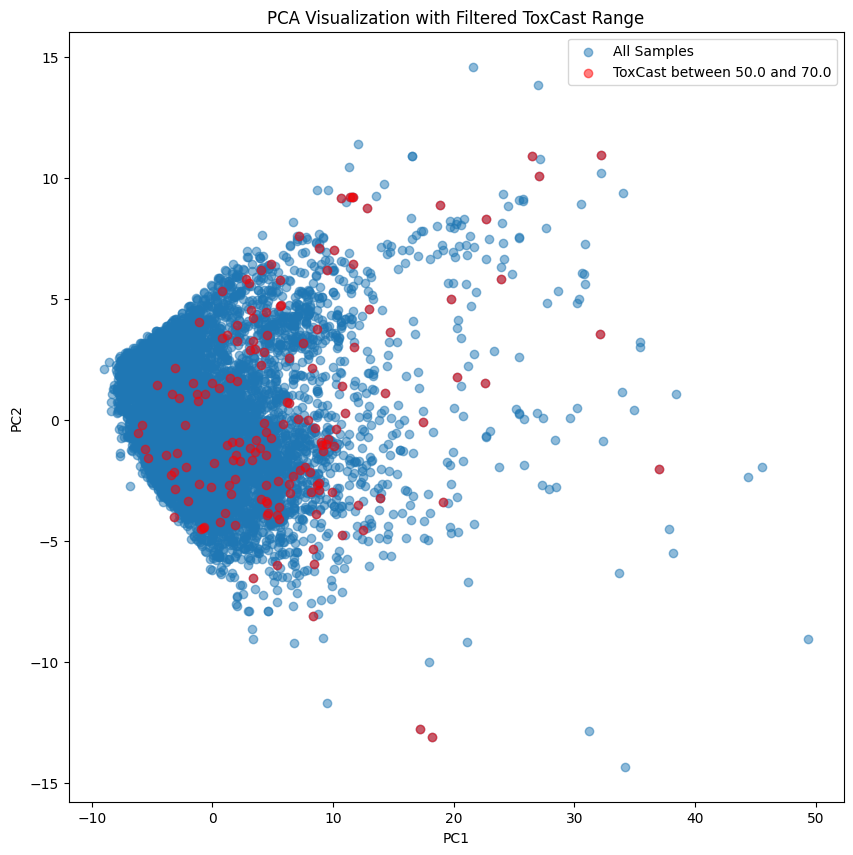

In [77]:
# Get user input for the range of ToxCast values
min_toxcast = float(input("Enter the minimum ToxCast value: "))
max_toxcast = float(input("Enter the maximum ToxCast value: "))

# Filter data2 based on the specified range
filtered_data = data2[(data2['ToxCast'] >= min_toxcast) & (data2['ToxCast'] <= max_toxcast)]

# Get indices of the filtered data in the original data2
filtered_indices = filtered_data.index

# Filter filtered_indices to include only indices present in the X_cleaned index
# This is necessary because some rows from data2 might have been dropped
# during the data cleaning and feature selection steps before PCA.
# X_cleaned is a DataFrame and retains the original index, and scores
# corresponds to the rows of X_cleaned in the same order.
valid_filtered_indices_in_cleaned_data = filtered_indices.intersection(X_cleaned.index)

# Get the integer positions of these valid indices within the X_cleaned (and thus scores) data
# We need the positions (0, 1, 2, ...) in the numpy array, not the original index values.
# Create a mapping from original index value to position in X_cleaned's index.
index_to_position = {index: position for position, index in enumerate(X_cleaned.index)}

# Get the positions for the valid filtered indices
filtered_positions_in_scores = [index_to_position[idx] for idx in valid_filtered_indices_in_cleaned_data]


# Plot PCA results, highlighting the filtered data
plt.figure(figsize=(10, 10))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5, label='All Samples')  # Plot all samples
# Use the filtered integer positions to select rows from the scores array
plt.scatter(scores[filtered_positions_in_scores, 0], scores[filtered_positions_in_scores, 1], color='red', alpha=0.5, label=f'ToxCast between {min_toxcast} and {max_toxcast}')  # Highlight filtered samples
plt.title("PCA Visualization with Filtered ToxCast Range")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

## Seleção de faixas do indice ToxCast

Do you want to add another ToxCast range to plot? (yes/no): no


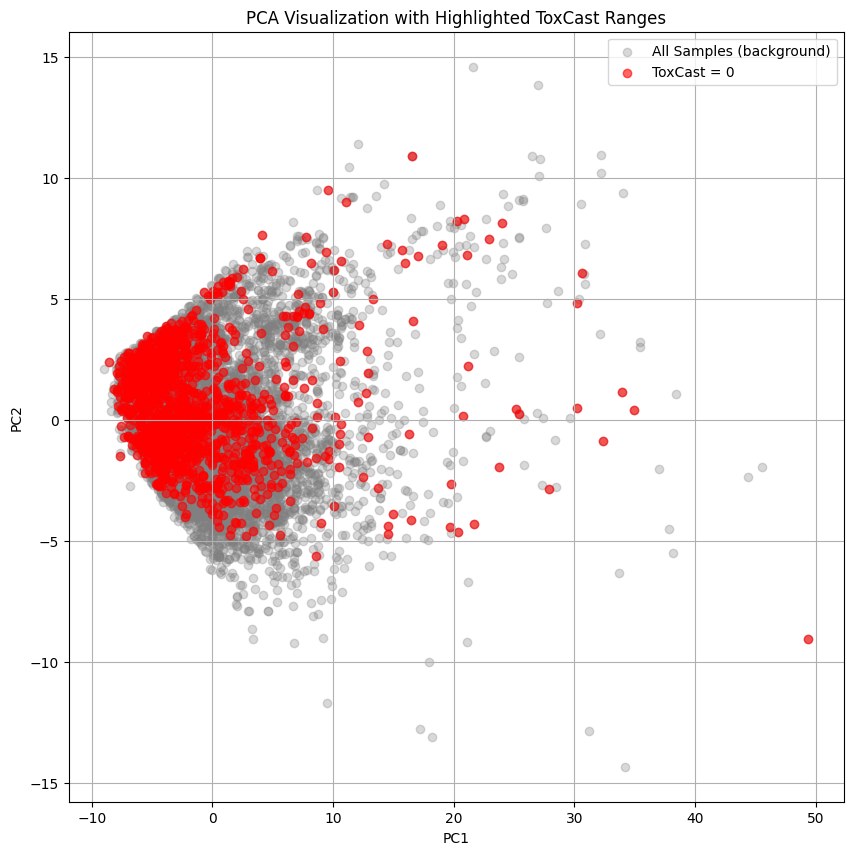

In [78]:
# Get user input for additional ranges
ranges_to_plot = [(0, 0, 'red', 'ToxCast = 0')] # Start with ToxCast = 0

while True:
    add_range = input("Do you want to add another ToxCast range to plot? (yes/no): ").lower()
    if add_range == 'yes':
        try:
            min_val = float(input("Enter the minimum ToxCast value for this range: "))
            max_val = float(input("Enter the maximum ToxCast value for this range: "))
            color = input("Enter the color for this range (e.g., 'blue', 'green', 'purple'): ")
            label = input("Enter the label for this range (e.g., 'ToxCast between 1 and 5'): ")
            ranges_to_plot.append((min_val, max_val, color, label))
        except ValueError:
            print("Invalid input. Please enter numerical values for the range.")
    else:
        break

plt.figure(figsize=(10, 10))

# Plot all samples initially with a default color and alpha
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.3, color='gray', label='All Samples (background)')

# Create a mapping from original index value to position in X_cleaned's index.
index_to_position = {index: position for position, index in enumerate(X_cleaned.index)}


# Iterate through the defined ranges and plot
for min_toxcast, max_toxcast, color, label in ranges_to_plot:
    if min_toxcast == 0 and max_toxcast == 0:
        # Special handling for ToxCast = 0
        zero_indices = data2[data2['ToxCast'] == 0].index
        valid_zero_indices_in_cleaned_data = zero_indices.intersection(X_cleaned.index)
        zero_positions_in_scores = [index_to_position[idx] for idx in valid_zero_indices_in_cleaned_data]
        plt.scatter(scores[zero_positions_in_scores, 0], scores[zero_positions_in_scores, 1], color=color, alpha=0.6, label=label)
    else:
        # Handling for other ranges
        filtered_data = data2[(data2['ToxCast'] >= min_toxcast) & (data2['ToxCast'] <= max_toxcast)]
        filtered_indices = filtered_data.index
        valid_filtered_indices_in_cleaned_data = filtered_indices.intersection(X_cleaned.index)
        filtered_positions_in_scores = [index_to_position[idx] for idx in valid_filtered_indices_in_cleaned_data]
        plt.scatter(scores[filtered_positions_in_scores, 0], scores[filtered_positions_in_scores, 1], color=color, alpha=0.6, label=label)


plt.title("PCA Visualization with Highlighted ToxCast Ranges")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# PCA loadings

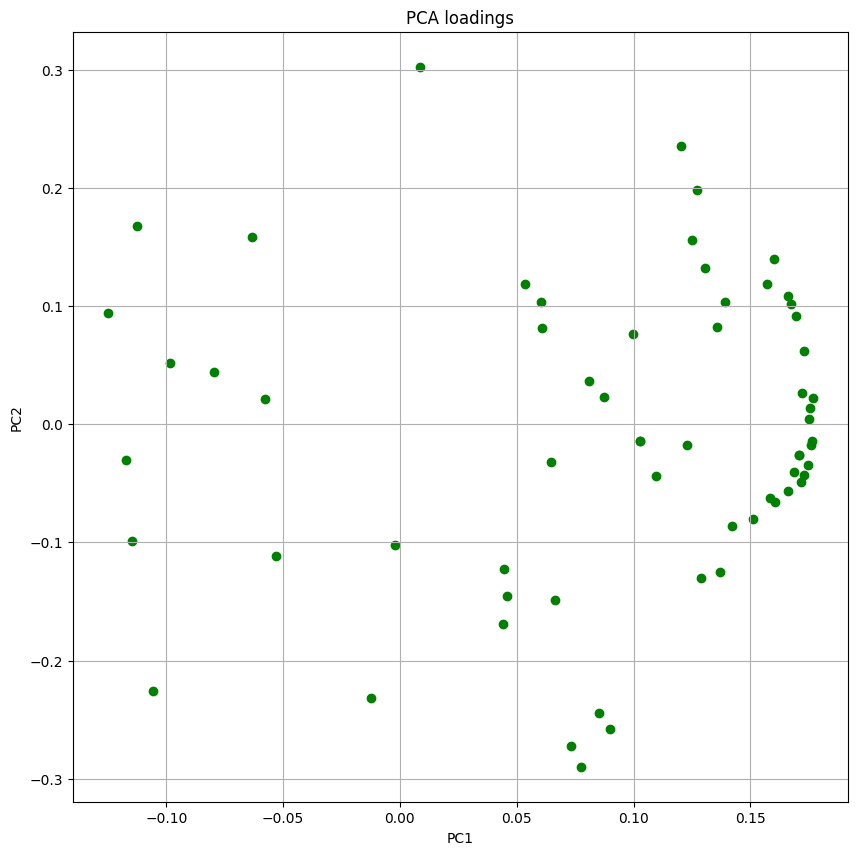

In [79]:
plt.figure(figsize=(10, 10))
plt.scatter(loadings[:,0], loadings[:,1], marker='o', color='g')  # PC1 x PC2

plt.title('PCA loadings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

In [80]:
# Get the names of the original variables (columns in X_cleaned)
# This line is no longer needed as we will use selected_features_names

# Print the loadings for each original variable for the first 2 principal components
# You can change the range to see loadings for more components
print("Loadings of selected features for the first few principal components:")
# Iterate through the names of the selected features
for i, var_name in enumerate(selected_features_names):
    # Use the index 'i' to access the corresponding loading in the loadings array
    print(f"Variable: {var_name} - Loadings (PC1, PC2): ({loadings[i, 0]:.4f}, {loadings[i, 1]:.4f})")

Loadings of selected features for the first few principal components:
Variable: MaxEStateIndex - Loadings (PC1, PC2): (0.1026, -0.0144)
Variable: MaxAbsEStateIndex - Loadings (PC1, PC2): (0.1027, -0.0143)
Variable: qed - Loadings (PC1, PC2): (-0.0531, -0.1115)
Variable: MolWt - Loadings (PC1, PC2): (0.1707, -0.0264)
Variable: HeavyAtomMolWt - Loadings (PC1, PC2): (0.1685, -0.0409)
Variable: ExactMolWt - Loadings (PC1, PC2): (0.1707, -0.0262)
Variable: NumValenceElectrons - Loadings (PC1, PC2): (0.1755, 0.0135)
Variable: FpDensityMorgan1 - Loadings (PC1, PC2): (-0.0984, 0.0515)
Variable: FpDensityMorgan2 - Loadings (PC1, PC2): (-0.0795, 0.0441)
Variable: FpDensityMorgan3 - Loadings (PC1, PC2): (-0.0576, 0.0211)
Variable: BCUT2D_MRHI - Loadings (PC1, PC2): (-0.0124, -0.2317)
Variable: BalabanJ - Loadings (PC1, PC2): (-0.0631, 0.1580)
Variable: BertzCT - Loadings (PC1, PC2): (0.1752, 0.0043)
Variable: Chi0 - Loadings (PC1, PC2): (0.1697, 0.0917)
Variable: Chi0n - Loadings (PC1, PC2): (0.1

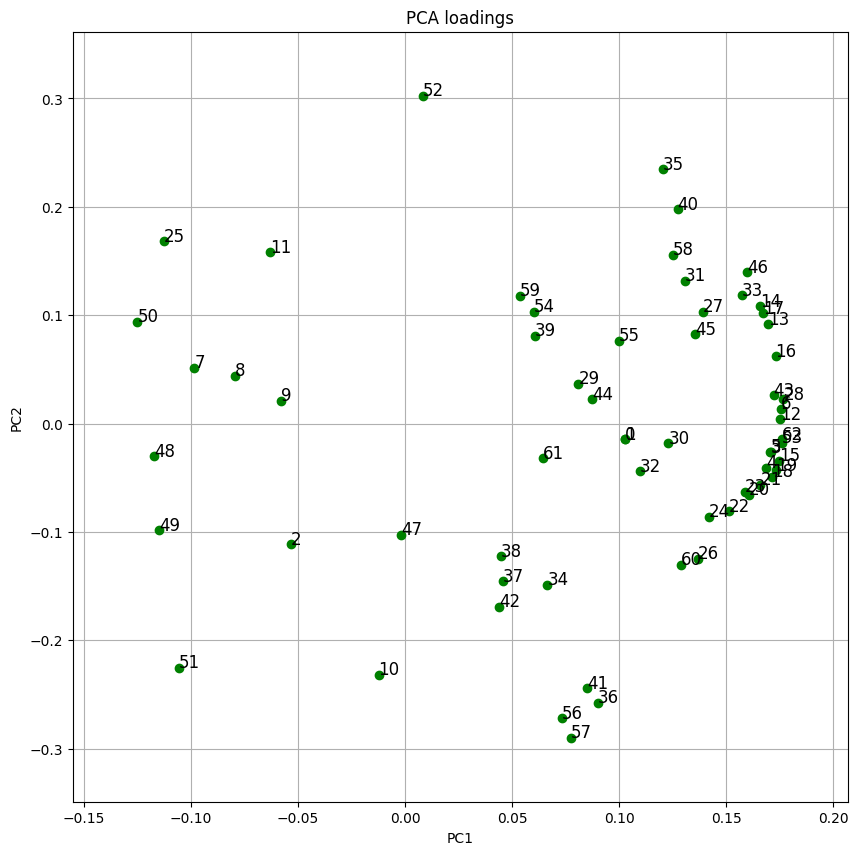

In [81]:
plt.figure(figsize=(10, 10))
for filtered_positions_in_scores, value in enumerate(loadings):
    x = loadings[filtered_positions_in_scores,0]
    y = loadings[filtered_positions_in_scores,1]
    plt.plot(x, y, color='green', marker='o')  # parametros do grafico
    # index + 1 para ficar igual ao Matlab
    plt.text(x, y, str(filtered_positions_in_scores), fontsize=12)  # parametros da fonte dos numeros
    plt.margins(0.1)  # espaço das margens do grafico

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA loadings')
plt.grid()
plt.show()

## Relação entre os 'Selected Feature Names' e os indices de Loadings

In [82]:
import pandas as pd

# Create a list of tuples with (selected feature name, index in loadings/selected_features_names)
feature_loading_index_mapping = []
for i, feature_name in enumerate(selected_features_names):
    feature_loading_index_mapping.append((feature_name, i))

# Create a DataFrame from the list
feature_loading_index_mapping_df = pd.DataFrame(feature_loading_index_mapping, columns=['Selected Feature Name', 'Index in Loadings Array'])

# Display the DataFrame
print("Mapping of Selected Feature Names to their Index in the Loadings Array:")
display(feature_loading_index_mapping_df)

Mapping of Selected Feature Names to their Index in the Loadings Array:


,Selected Feature Name,Index in Loadings Array
0,MaxEStateIndex,0
1,MaxAbsEStateIndex,1
2,qed,2
3,MolWt,3
4,HeavyAtomMolWt,4
...,...,...
58,NumRotatableBonds,58
59,NumSaturatedCarbocycles,59
60,RingCount,60
61,MolLogP,61


In [83]:
for filtered_positions_in_scores, value in enumerate(loadings):
  print(filtered_positions_in_scores,'====>', loadings[filtered_positions_in_scores,0])

0 ====> 0.10261506333365024
1 ====> 0.10265743811713979
2 ====> -0.05311468310537973
3 ====> 0.17065138377041575
4 ====> 0.16849415465660114
5 ====> 0.17072552614194259
6 ====> 0.17547493165405847
7 ====> -0.09838591534309134
8 ====> -0.07950810857933191
9 ====> -0.05764735689763039
10 ====> -0.012351203931934262
11 ====> -0.06313768685079378
12 ====> 0.17524165388413043
13 ====> 0.16970335999472994
14 ====> 0.16593919784437688
15 ====> 0.17455206347057958
16 ====> 0.17305835092071184
17 ====> 0.1672843667096976
18 ====> 0.1715530175177431
19 ====> 0.17314782839517673
20 ====> 0.16056162752556313
21 ====> 0.16592317870198728
22 ====> 0.1512762925974748
23 ====> 0.1585657213904917
24 ====> 0.14196055502423952
25 ====> -0.1125987288196484
26 ====> 0.1368503029278947
27 ====> 0.13922619980451012
28 ====> 0.17665662973744853
29 ====> 0.08094255330149011
30 ====> 0.12291586529242701
31 ====> 0.13076594550595547
32 ====> 0.10968919031629668
33 ====> 0.15714490748080412
34 ====> 0.06641982030

# Modelo com scores do PCA

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scores, saida_cleaned, test_size=0.25, random_state=13)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.10, random_state=13)

In [85]:
modelo2 = ExtraTreesRegressor(n_estimators=200, min_samples_leaf=2, random_state=13).fit(X_train, y_train)

In [86]:
# calculo da previsão

ypred = modelo2.predict(X_test)

ypredc = modelo2.predict(X_train)

ypredv = modelo2.predict(X_validation)

# Avaliação

In [87]:
mset = mean_squared_error(y_test, ypred)
rmset = math.sqrt(mset)

print("The mean squared error (MSE) on test set: {:.4f}".format(mset))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmset))

msec = mean_squared_error(y_train, ypredc)
rmsec = math.sqrt(msec)
print('\n')
print("The mean squared error (MSE) on training set: {:.4f}".format(msec))
print("The root mean squared error (RMSE) on training set: {:.4f}".format(rmsec))

msev = mean_squared_error(y_validation, ypredv)
rmsev = math.sqrt(msev)
print('\n')
print("The mean squared error (MSE) on validation set: {:.4f}".format(msev))
print("The root mean squared error (RMSE) on validation set: {:.4f}".format(rmsev))

The mean squared error (MSE) on test set: 87.0131
The root mean squared error (RMSE) on test set: 9.3281


The mean squared error (MSE) on training set: 5.5206
The root mean squared error (RMSE) on training set: 2.3496


The mean squared error (MSE) on validation set: 89.6815
The root mean squared error (RMSE) on validation set: 9.4700


In [88]:
from sklearn.metrics import mean_absolute_error

maet = mean_absolute_error(y_test, ypred)
print("The mean absolute error (MAE) on test set: {:.4f}".format(maet))
maec = mean_absolute_error(y_train, ypredc)
print('\n')
print("The mean absolute error (MAE) on training set: {:.4f}".format(maec))
maev = mean_absolute_error(y_validation, ypredv)
print('\n')
print("The mean absolute error (MAE) on validation set: {:.4f}".format(maev))

The mean absolute error (MAE) on test set: 6.1515


The mean absolute error (MAE) on training set: 1.2246


The mean absolute error (MAE) on validation set: 6.1132


In [89]:
# avaliação do conj teste
test_r2 = r2_score(y_test, ypred)
print('Reg linear coef R2 (teste): ', test_r2)

# avaliação do conj calibração
cal_r2 = r2_score(y_train, ypredc)
print('Reg linear coef R2 (calibração): ', cal_r2)

# avaliação do conj validação
val_r2 = r2_score(y_validation, ypredv)
print('Reg linear coef R2 (validação): ', val_r2)

Reg linear coef R2 (teste):  0.4177247694468714
Reg linear coef R2 (calibração):  0.9652610259403446
Reg linear coef R2 (validação):  0.4148513416913342


Text(0.5, 0, 'y experimental')

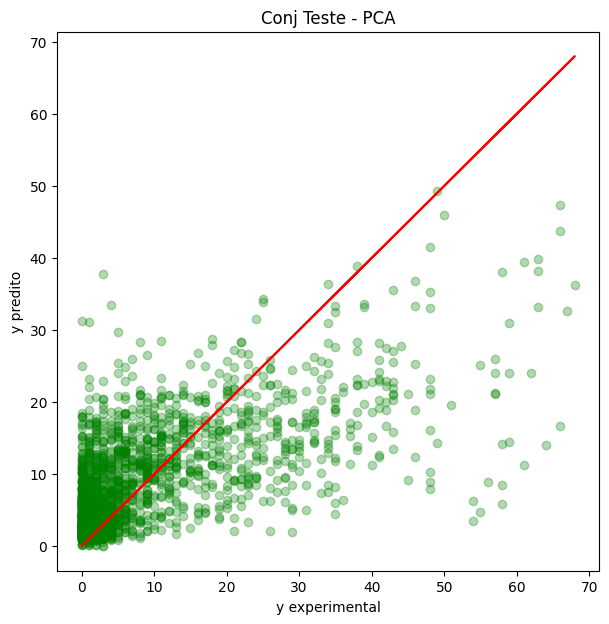

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_test, y=ypred, c='green' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_test, y_test, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_test, p(y_test), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Teste - PCA')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

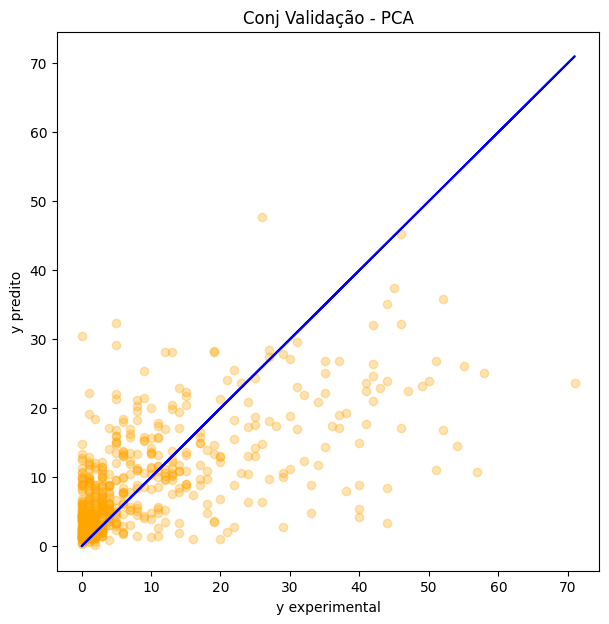

In [91]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_validation, y=ypredv, c='orange' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_validation, y_validation, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_validation, p(y_validation), 'blue')  # cor da linha e geraçao da mesma
plt.title('Conj Validação - PCA')
plt.ylabel('y predito')
plt.xlabel('y experimental')

Text(0.5, 0, 'y experimental')

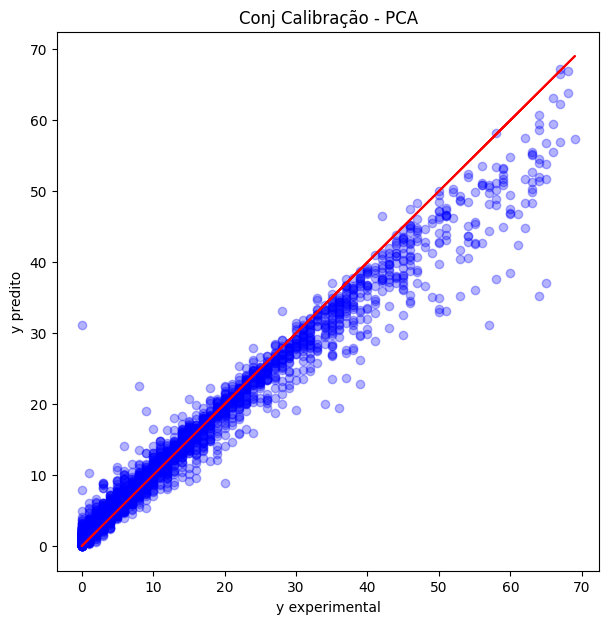

In [92]:
plt.figure(figsize=(7, 7))  # tamanho do gráfico
plt.scatter(x=y_train, y=ypredc, c='blue' ,alpha=0.3) # dispersão dos dados

z = np.polyfit(y_train, y_train, 1)  #linha vermelha de referência - parte 1
p = np.poly1d(z)  # equação da linha - parte 2

plt.plot(y_train, p(y_train), 'red')  # cor da linha e geraçao da mesma
plt.title('Conj Calibração - PCA')
plt.ylabel('y predito')
plt.xlabel('y experimental')

In [93]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=13), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to your training data (using X_new after feature selection)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R2 score:", grid_search.best_score_)

# Train the model with the best parameters on the full training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
test_r2_best_model = best_model.score(X_test, y_test)
print('R2 on test set with best model:', test_r2_best_model)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import ExtraTreesRegressor\n\n# Define the parameter grid to search\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_features\': [\'sqrt\', \'log2\', None],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(ExtraTreesRegressor(random_state=13), param_grid, cv=5, scoring=\'r2\', n_jobs=-1)\n\n# Fit the grid search to your training data (using X_new after feature selection)\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and the best score\nprint("Best parameters:", grid_search.best_params_)\nprint("Best cross-validation R2 score:", grid_search.best_score_)\n\n# Train the model with the best parameters on the full training data\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\n\n# Evaluate the best model on the test set\ntes